In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

In [228]:
#Loading Dataset
df = pd.read_csv('monthly_milk_production-dataset.csv',index_col='Date',parse_dates=True)

In [229]:
#convert the dataset to have monthly intervals
df.index.freq='MS'

In [230]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

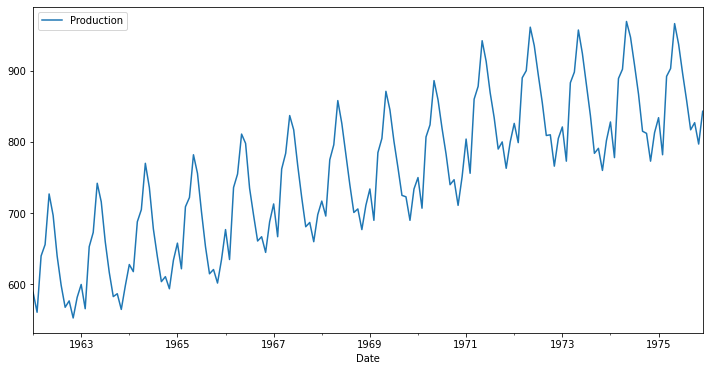

In [231]:
#plot the monthly milk production dataset
df.plot(figsize=(12,6))

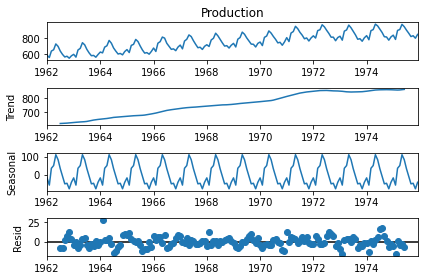

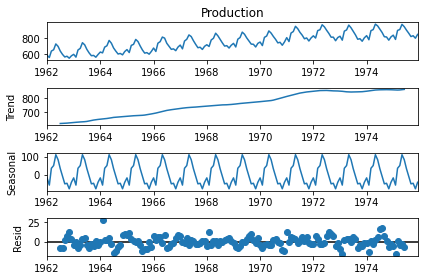

In [232]:
#Decomposing the time series into components

decomposable_components = seasonal_decompose(df['Production'])
decomposable_components.plot()

In [233]:
#Splitting the time series dataset into training and testing dates

train_dates = df.iloc[:156]
test_dates = df.iloc[:156]

In [234]:
#Scaling the time series dataset

scaler = MinMaxScaler()

In [235]:
#fit our scaler to both the training and testing dates

scaler.fit(train_dates)
scaler.fit(test_dates)

MinMaxScaler()

In [236]:
#convert the training and testing dates

scaled_train_dates = scaler.transform(train_dates)
scaled_test_dates = scaler.transform(test_dates)

In [237]:
#scaled time series values

scaled_train_dates[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [238]:
n_input = 12
n_features = 1

In [239]:
#Format the scaled data points into batches

generated_batches = TimeseriesGenerator(scaled_train_dates, scaled_test_dates, length=n_input, batch_size=1)

In [240]:
#Building the time series model

lstm_model = Sequential()

In [241]:
#add the LSTM layer

lstm_model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))

In [242]:
#add the Dense layer 

lstm_model.add(Dense(1))

In [243]:
#Compiling the sequential time series model

lstm_model.compile(optimizer='adam', loss='mse')

In [244]:
#Printing the summary of the sequential time series model

lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [245]:
#Fitting the sequential model to the generated batches

lstm_model.fit(generated_batches,epochs=100)

Epoch 1/100
144/144 [==============================] - 2s 4ms/step - loss: 0.0410
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0218
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0186
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0159
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0103
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 8/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 9/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 10/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 11/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 12/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 13/100


In [246]:
#Using the trained sequential model to make predictions

prediction_result = []

test_batches = scaled_train_dates[-n_input:]
reshaping_batches = test_batches.reshape((1, n_input, n_features))

In [247]:
#analyze the data points and make predictions

for i in range(len(test_dates)):

    predicted_output = lstm_model.predict(reshaping_batches )[0]

    prediction_result.append(predicted_output) 

    reshaping_batches = np.append(reshaping_batches [:,1:,:],[[predicted_output]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [248]:
#predicted results

prediction_result

[array([0.6325843], dtype=float32),
 array([0.58832365], dtype=float32),
 array([0.7780972], dtype=float32),
 array([0.8349888], dtype=float32),
 array([0.9642397], dtype=float32),
 array([0.93087316], dtype=float32),
 array([0.8646834], dtype=float32),
 array([0.7531335], dtype=float32),
 array([0.63763475], dtype=float32),
 array([0.59866387], dtype=float32),
 array([0.5366018], dtype=float32),
 array([0.5972677], dtype=float32),
 array([0.6137927], dtype=float32),
 array([0.6161407], dtype=float32),
 array([0.76295316], dtype=float32),
 array([0.8329967], dtype=float32),
 array([0.937325], dtype=float32),
 array([0.9195169], dtype=float32),
 array([0.86686444], dtype=float32),
 array([0.75415367], dtype=float32),
 array([0.6419045], dtype=float32),
 array([0.5852893], dtype=float32),
 array([0.537827], dtype=float32),
 array([0.5757428], dtype=float32),
 array([0.60014594], dtype=float32),
 array([0.6316809], dtype=float32),
 array([0.7549198], dtype=float32),
 array([0.8323863], dt

C:\Users\ASUS\AppData\Local\Temp/ipykernel_27072/4375326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates['Predictions'] = actual_values


<AxesSubplot:xlabel='Date'>

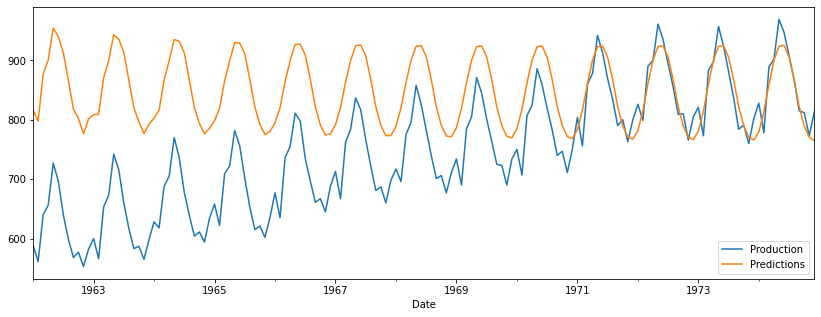

In [249]:
# Plotting the line graph

actual_values = scaler.inverse_transform(prediction_result)
test_dates['Predictions'] = actual_values
test_dates.plot(figsize=(14,5))